In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)


In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [3]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=100)

from graphlearn.graphlearn import Sampler
from eden.graph import Vectorizer
sampler=Sampler(radius_list=[0,1], thickness_list=[2],random_state=42447,
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(3))
sampler.fit(training_graphs)

print('graph grammar stats:')
n_instances, interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances, interface_counts, core_counts, cip_counts))
sampler.save('tmp/sampler.ge')

fitting was asked with n=1

Classifier:
SGDClassifier(alpha=0.000942105864655, average=False, class_weight=None,
       epsilon=0.1, eta0=0.700417223464, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='log', n_iter=98, n_jobs=1,
       penalty='l1', power_t=0.237468887947, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#instances: 100  #interfaces: 45   #cores: 35   #core-interface-pairs: 135
graph grammar stats:
#instances: 100   #interfaces: 45   #cores: 35   #core-interface-pairs: 135
Saved model: tmp/sampler.ge
CPU times: user 5.49 s, sys: 564 ms, total: 6.05 s
Wall time: 14.6 s


In [4]:
%%time
from graphlearn.graphlearn import Sampler
sampler=Sampler()
sampler.load('tmp/sampler.ge')

# graph sampling
graphs = get_graphs(dataset_fname, size=100)

id_start=34
id_end=id_start+12
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=20
n_samples=3

graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=False,
                        probabilistic_core_choice=False,
                        score_core_choice= True,
                        max_core_size_diff=-1,
                        burnin=1,
                        omit_seed=False,
                        proposal_probability = True,
                        improving_threshold=.8, 
                        improving_linear_start=0.2,
                        accept_static_penalty=0.0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True,  
                        monitor=True)

Loaded model: tmp/sampler.ge
CPU times: user 184 ms, sys: 44 ms, total: 228 ms
Wall time: 228 ms


preprocessing grammar
_sample_notes: None
accept_static_penalty: 0.0
batch_size: 10
    burnin: 1
estimatorobject: <graphlearn.estimator.Wrapper instance at 0x7f28ce1cd098>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f28ccc86908>
generator_mode: False
hash_bitmask: 1048575
improving_linear_start: 4
improving_penalty_per_step: 0.0833333333333
improving_threshold: 16
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f28ce1d9b90>
max_core_size_diff: -2
maxbacktrack: 0
   monitor: True
  monitors: []
    n_jobs: 1
   n_steps: 20
      nbit: 20
node_entity_check: <function <lambda> at 0x7f28cfef5de8>
 omit_seed: False
postprocessor: <graphlearn.processing.PostProcessor object at 0x7f28ce1d9a10>
preprocessor: <graphlearn.processing.PreProcessor object at 0x7f28ce1d9a50>
probabilistic_core_choice: False
proposal_probability: True
quick_skip_orig_cip: False
radius_list: [0, 2]
random_state

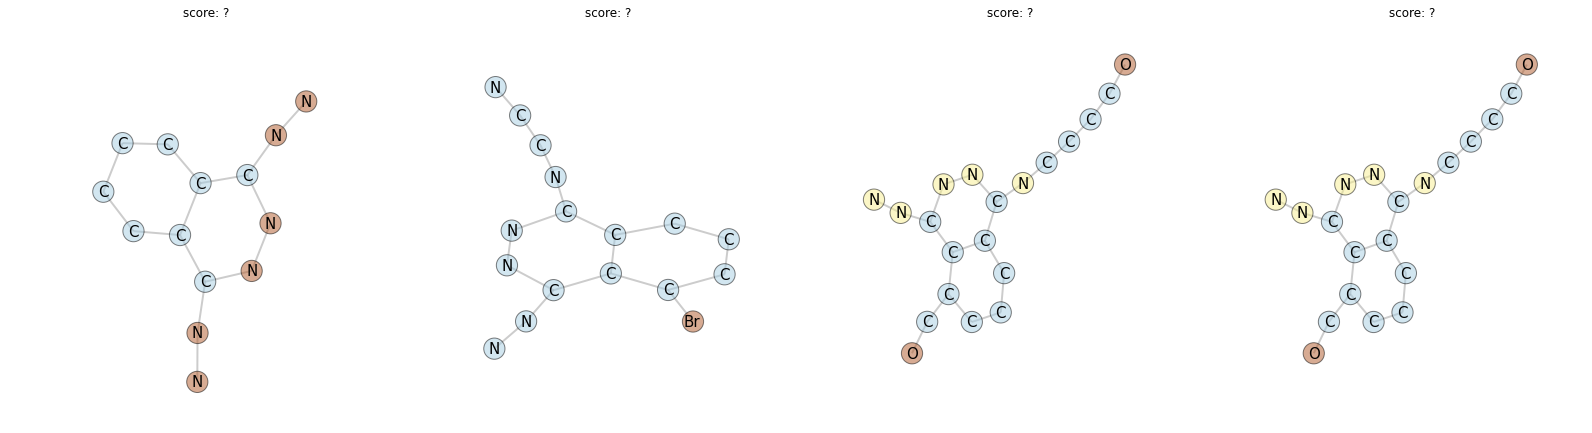

_propose_graph: iteration 0 ; core 0 of 10 ; original_cips tried  0 ; size 43
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  0 ; size 43
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 45
_propose_graph: iteration 3 ; core 0 of 10 ; original_cips tried  0 ; size 47
_propose_graph: iteration 4 ; core 0 of 9 ; original_cips tried  0 ; size 49
_propose_graph: iteration 5 ; core 0 of 5 ; original_cips tried  0 ; size 47
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 8 ; core 0 of 10 ; original_cips tried  0 ; size 45
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0 ; size 49
_propose_graph: iteration 10 ; core 0 of 5 ; original_cips tried  0 ; size 51
_propose_graph: iteration 11 ; core 0 of 10 ; original_cips tried  0 ; size 51
_propose_graph: iteration 12 ; core 0 of 5 ; original_cips tried  0 ; 

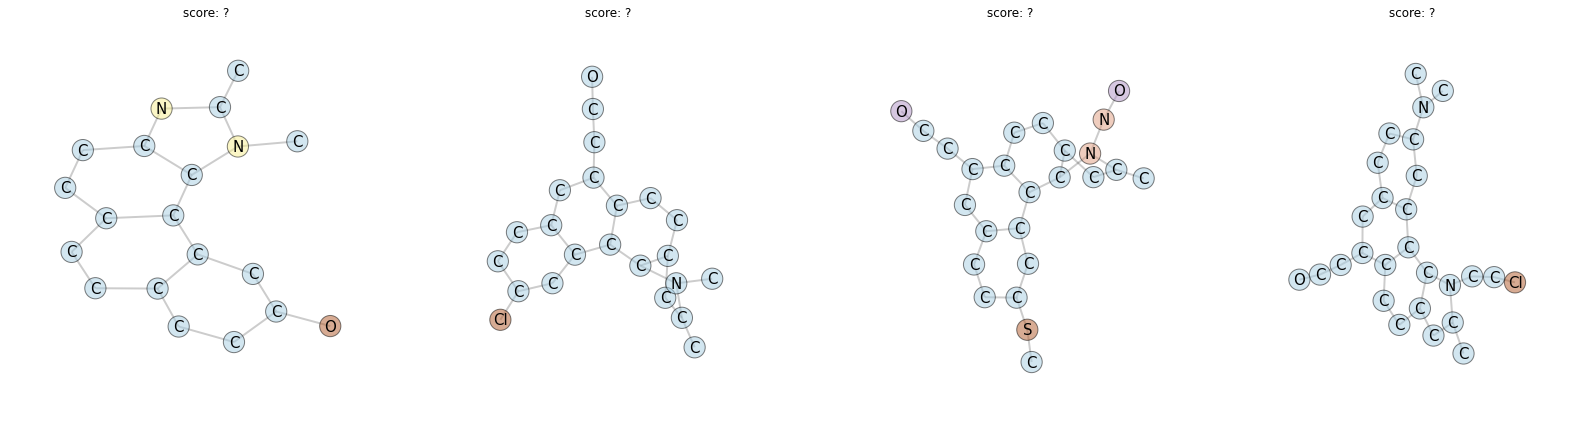

_propose_graph: iteration 0 ; core 0 of 10 ; original_cips tried  0 ; size 24
_propose_graph: iteration 1 ; core 0 of 9 ; original_cips tried  0 ; size 22
_propose_graph: iteration 2 ; core 0 of 10 ; original_cips tried  0 ; size 22
_propose_graph: iteration 3 ; core 0 of 10 ; original_cips tried  0 ; size 16
_propose_graph: iteration 4 ; core 0 of 10 ; original_cips tried  0 ; size 16
_propose_graph: iteration 5 ; core 0 of 10 ; original_cips tried  0 ; size 18
_propose_graph: iteration 6 ; core 0 of 9 ; original_cips tried  0 ; size 18
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 18
_propose_graph: iteration 8 ; core 0 of 10 ; original_cips tried  0 ; size 16
_propose_graph: iteration 9 ; core 0 of 3 ; original_cips tried  0 ; size 18
_propose_graph: iteration 10 ; core 0 of 9 ; original_cips tried  0 ; size 20
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 20
_propose_graph: iteration 12 ; core 0 of 3 ; original_cips tried  0 

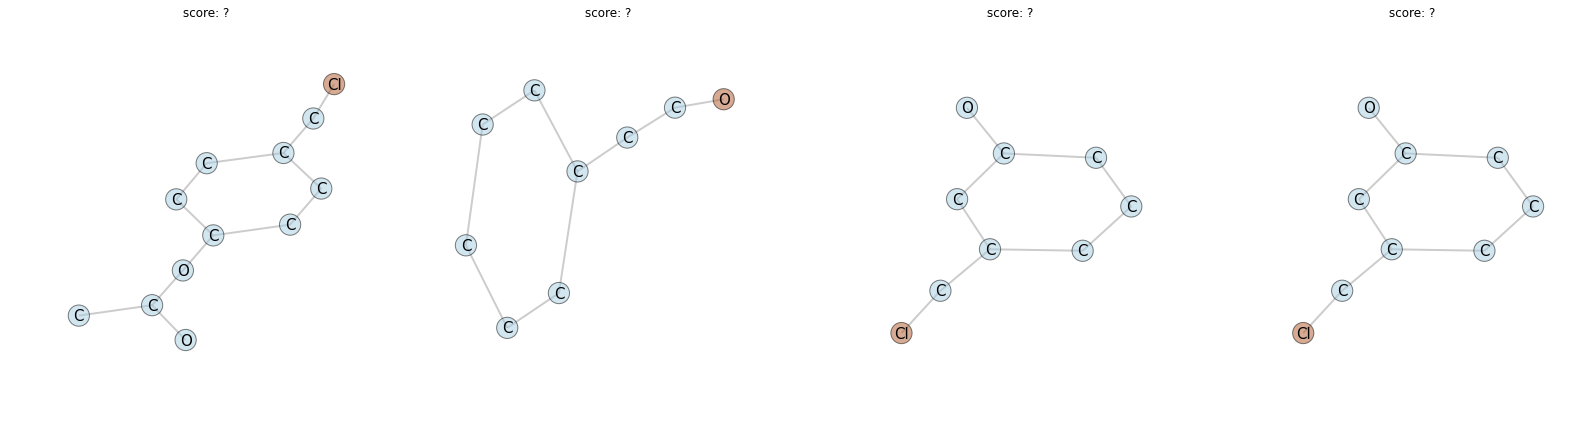

_propose_graph: iteration 0 ; core 0 of 1 ; original_cips tried  0 ; size 35
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 35
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 35
_propose_graph: iteration 3 ; core 0 of 10 ; original_cips tried  0 ; size 37
_propose_graph: iteration 4 ; core 0 of 9 ; original_cips tried  0 ; size 39
_propose_graph: iteration 5 ; core 0 of 9 ; original_cips tried  0 ; size 37
_propose_graph: iteration 6 ; core 0 of 9 ; original_cips tried  0 ; size 31
_propose_graph: iteration 7 ; core 0 of 1 ; original_cips tried  0 ; size 31
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0 ; size 31
_propose_graph: iteration 9 ; core 0 of 10 ; original_cips tried  0 ; size 31
_propose_graph: iteration 10 ; core 0 of 1 ; original_cips tried  0 ; size 31
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 29
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips tried  0 ; si

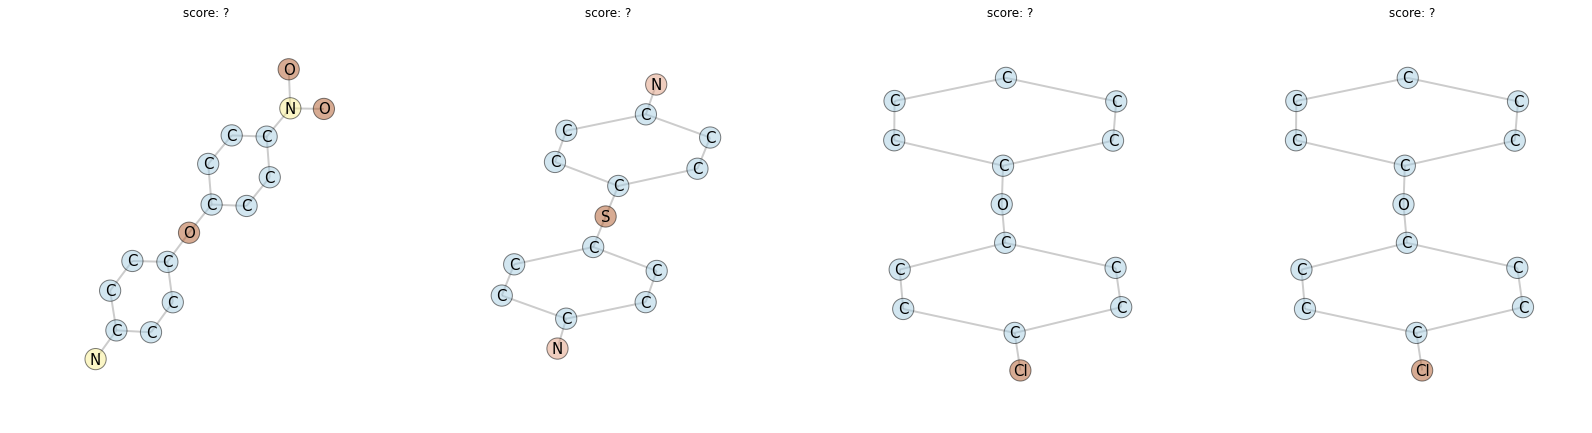

_propose_graph: iteration 0 ; core 0 of 2 ; original_cips tried  0 ; size 43
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 47
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 43
_propose_graph: iteration 3 ; core 0 of 2 ; original_cips tried  0 ; size 39
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 37
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 39
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 37
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  0 ; size 37
_propose_graph: iteration 8 ; core 0 of 4 ; original_cips tried  0 ; size 33
_propose_graph: iteration 9 ; core 0 of 4 ; original_cips tried  0 ; size 35
_propose_graph: iteration 10 ; core 0 of 4 ; original_cips tried  0 ; size 35
_propose_graph: iteration 11 ; core 0 of 4 ; original_cips tried  0 ; size 35
_propose_graph: iteration 12 ; core 0 of 3 ; original_cips tried  0 ; size

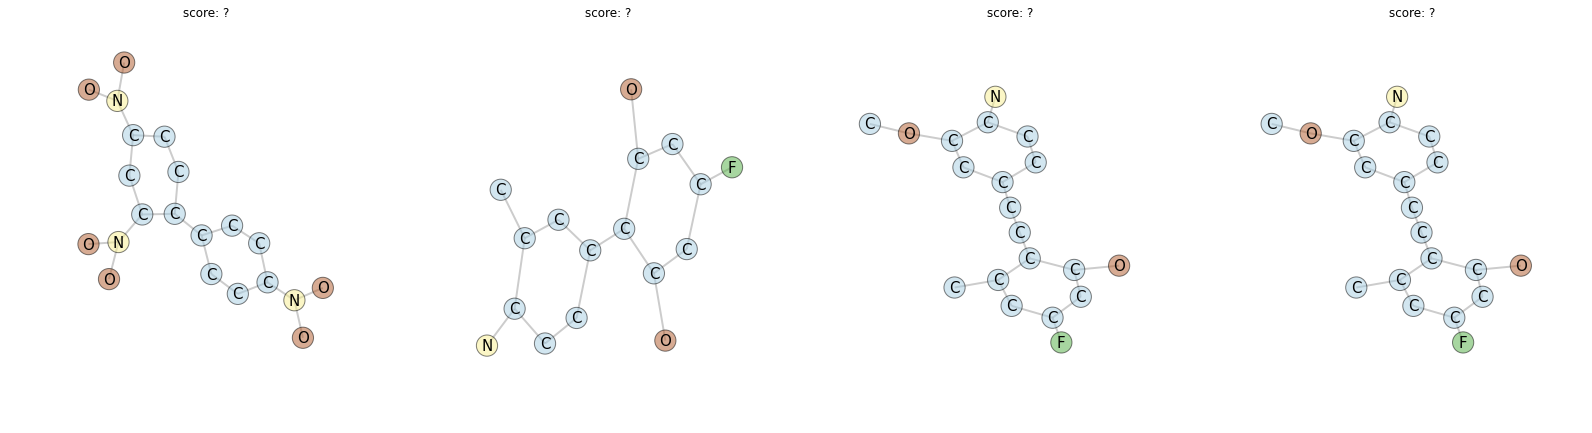

_propose_graph: iteration 0 ; core 0 of 9 ; original_cips tried  0 ; size 22
_propose_graph: iteration 1 ; core 0 of 9 ; original_cips tried  0 ; size 22
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 24
_propose_graph: iteration 3 ; core 0 of 9 ; original_cips tried  0 ; size 24
_propose_graph: iteration 4 ; core 0 of 10 ; original_cips tried  0 ; size 24
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 24
_propose_graph: iteration 6 ; core 0 of 1 ; original_cips tried  0 ; size 18
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  0 ; size 20
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 22
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 26
_propose_graph: iteration 10 ; core 0 of 10 ; original_cips tried  0 ; size 24
_propose_graph: iteration 11 ; core 0 of 5 ; original_cips tried  0 ; size 28
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ; si

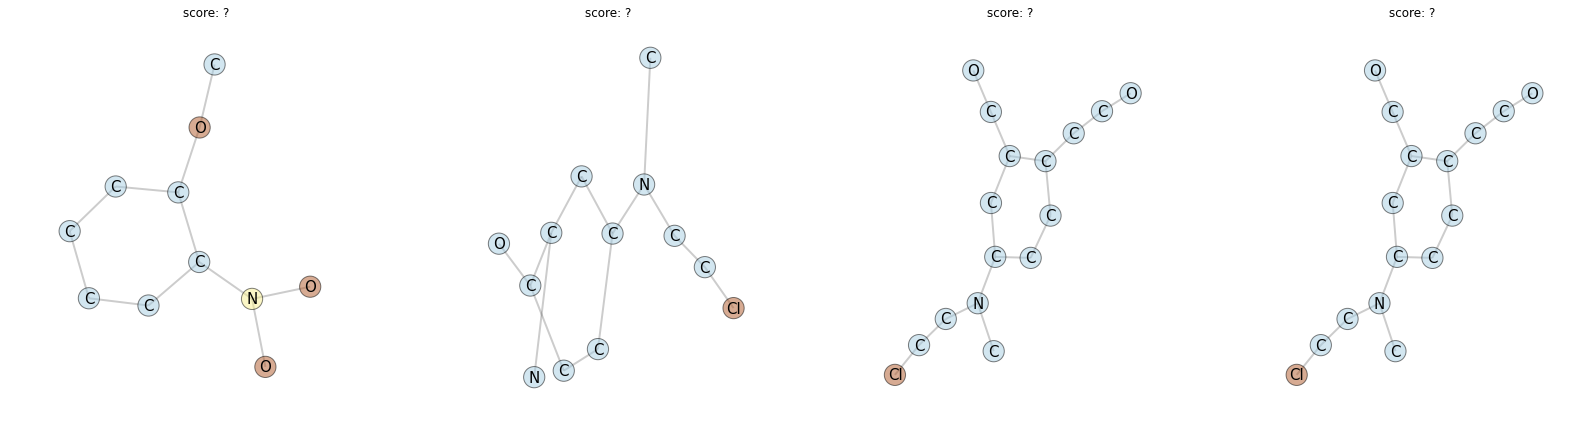

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0 ; size 39
_propose_graph: iteration 1 ; core 0 of 2 ; original_cips tried  0 ; size 41
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 45
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 45
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0 ; size 47
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 51
_propose_graph: iteration 6 ; core 0 of 10 ; original_cips tried  0 ; size 51
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 49
_propose_graph: iteration 8 ; core 0 of 10 ; original_cips tried  0 ; size 49
_propose_graph: iteration 9 ; core 0 of 2 ; original_cips tried  0 ; size 51
_propose_graph: iteration 10 ; core 0 of 5 ; original_cips tried  0 ; size 51
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 55
_propose_graph: iteration 12 ; core 0 of 5 ; original_cips tried  0 ; si

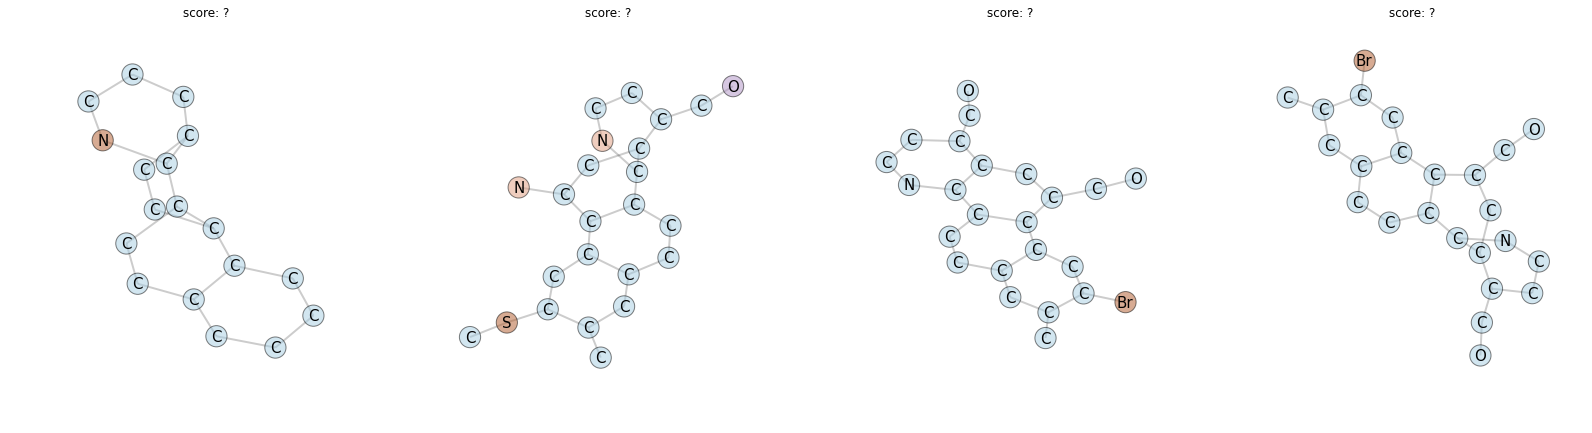

_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0 ; size 52
_propose_graph: iteration 1 ; core 0 of 5 ; original_cips tried  0 ; size 48
_propose_graph: iteration 2 ; core 0 of 5 ; original_cips tried  0 ; size 50
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 52
_propose_graph: iteration 4 ; core 0 of 9 ; original_cips tried  0 ; size 56
_propose_graph: iteration 5 ; core 0 of 10 ; original_cips tried  0 ; size 58
_propose_graph: iteration 6 ; core 0 of 4 ; original_cips tried  0 ; size 60
_propose_graph: iteration 7 ; core 0 of 5 ; original_cips tried  0 ; size 60
_propose_graph: iteration 8 ; core 0 of 9 ; original_cips tried  0 ; size 60
_propose_graph: iteration 9 ; core 0 of 4 ; original_cips tried  0 ; size 60
_propose_graph: iteration 10 ; core 0 of 5 ; original_cips tried  0 ; size 60
_propose_graph: iteration 11 ; core 0 of 3 ; original_cips tried  0 ; size 58
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ; siz

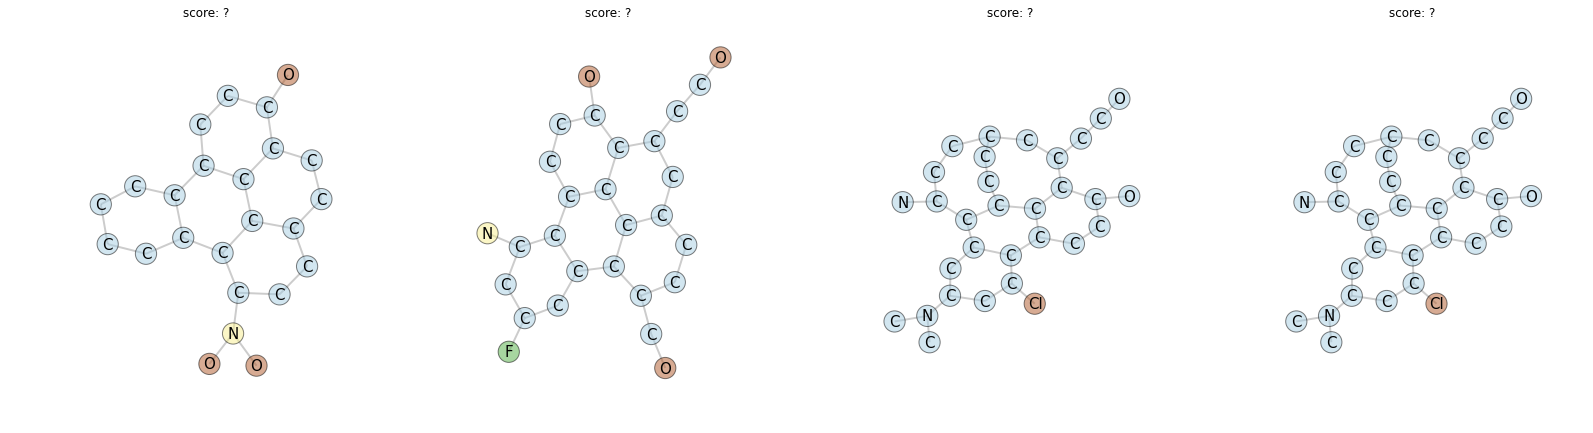

_propose_graph: iteration 0 ; core 0 of 10 ; original_cips tried  0 ; size 107
_propose_graph: iteration 1 ; core 0 of 10 ; original_cips tried  0 ; size 107
_propose_graph: iteration 2 ; core 0 of 2 ; original_cips tried  0 ; size 107
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 111
_propose_graph: iteration 4 ; core 0 of 9 ; original_cips tried  0 ; size 115
_propose_graph: iteration 5 ; core 0 of 1 ; original_cips tried  0 ; size 119
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0 ; size 117
_propose_graph: iteration 7 ; core 0 of 2 ; original_cips tried  0 ; size 121
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 123
_propose_graph: iteration 9 ; core 0 of 9 ; original_cips tried  0 ; size 123
_propose_graph: iteration 10 ; core 0 of 10 ; original_cips tried  0 ; size 123
_propose_graph: iteration 11 ; core 0 of 1 ; original_cips tried  0 ; size 123
_propose_graph: iteration 12 ; core 0 of 1 ; original_cips 

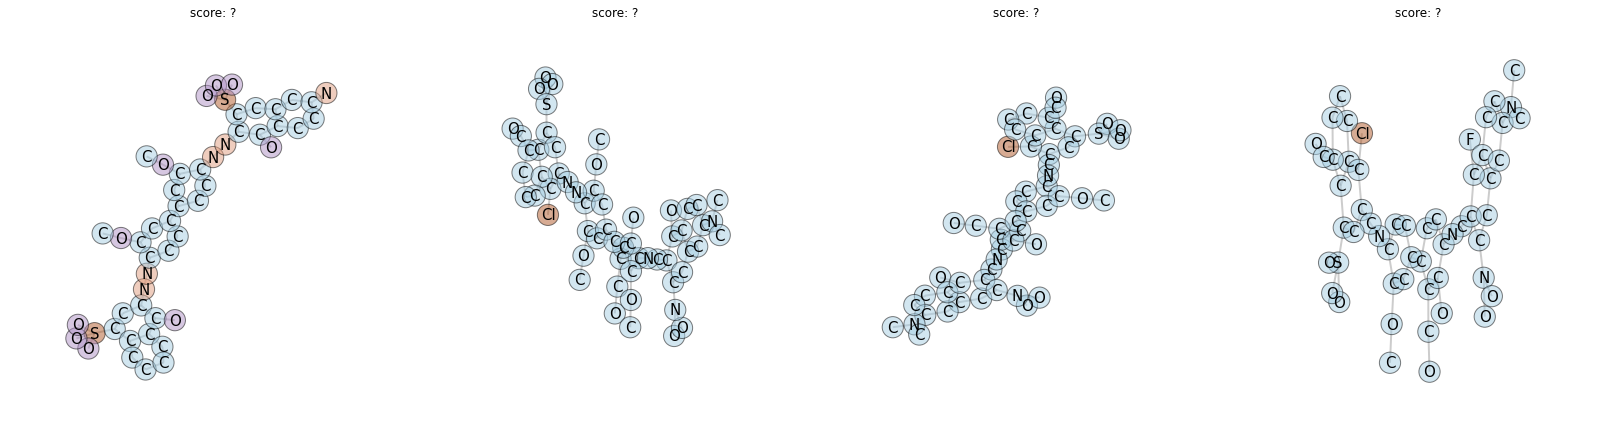

_propose_graph: iteration 0 ; core 0 of 10 ; original_cips tried  0 ; size 32
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 32
_propose_graph: iteration 2 ; core 0 of 10 ; original_cips tried  0 ; size 34
_propose_graph: iteration 3 ; core 0 of 1 ; original_cips tried  0 ; size 34
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 32
_propose_graph: iteration 5 ; core 0 of 2 ; original_cips tried  0 ; size 30
_propose_graph: iteration 6 ; core 0 of 10 ; original_cips tried  0 ; size 26
_propose_graph: iteration 7 ; core 0 of 9 ; original_cips tried  0 ; size 26
_propose_graph: iteration 8 ; core 0 of 2 ; original_cips tried  0 ; size 28
_propose_graph: iteration 9 ; core 0 of 10 ; original_cips tried  0 ; size 26
_propose_graph: iteration 10 ; core 0 of 9 ; original_cips tried  0 ; size 28
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 28
_propose_graph: iteration 12 ; core 0 of 10 ; original_cips tried  0 ;

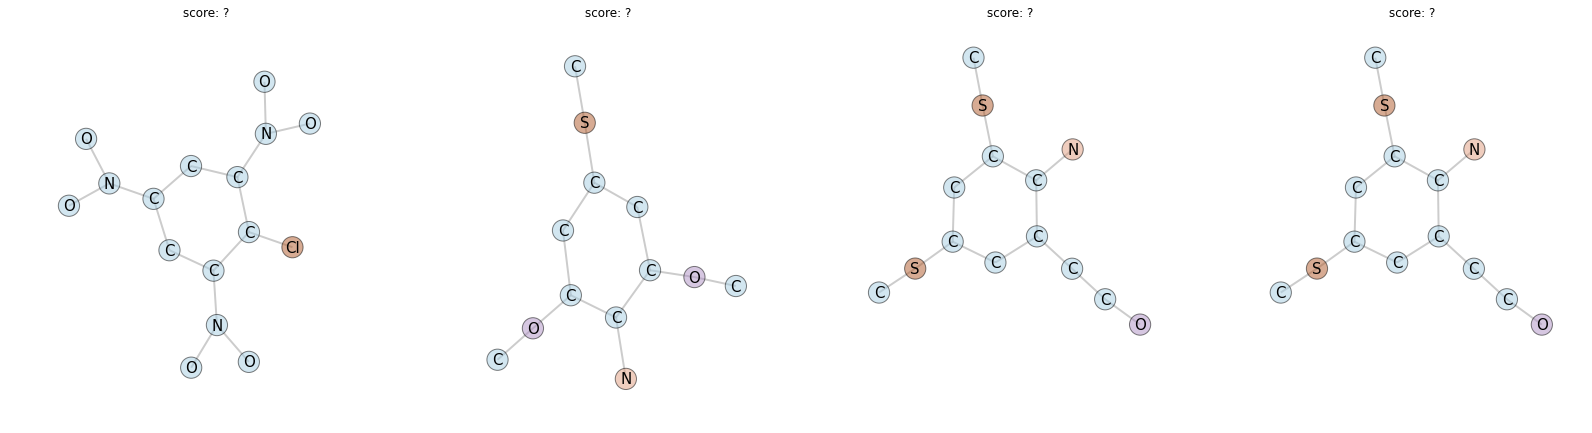

_propose_graph: iteration 0 ; core 0 of 5 ; original_cips tried  0 ; size 38
_propose_graph: iteration 1 ; core 0 of 1 ; original_cips tried  0 ; size 40
_propose_graph: iteration 2 ; core 0 of 1 ; original_cips tried  0 ; size 40
_propose_graph: iteration 3 ; core 0 of 5 ; original_cips tried  0 ; size 42
_propose_graph: iteration 4 ; core 0 of 1 ; original_cips tried  0 ; size 42
_propose_graph: iteration 5 ; core 0 of 9 ; original_cips tried  0 ; size 46
_propose_graph: iteration 6 ; core 0 of 5 ; original_cips tried  0 ; size 46
_propose_graph: iteration 7 ; core 0 of 3 ; original_cips tried  0 ; size 46
_propose_graph: iteration 8 ; core 0 of 1 ; original_cips tried  0 ; size 46
_propose_graph: iteration 9 ; core 0 of 1 ; original_cips tried  0 ; size 48
_propose_graph: iteration 10 ; core 0 of 9 ; original_cips tried  0 ; size 44
_propose_graph: iteration 11 ; core 0 of 3 ; original_cips tried  0 ; size 44
_propose_graph: iteration 12 ; core 0 of 10 ; original_cips tried  0 ; siz

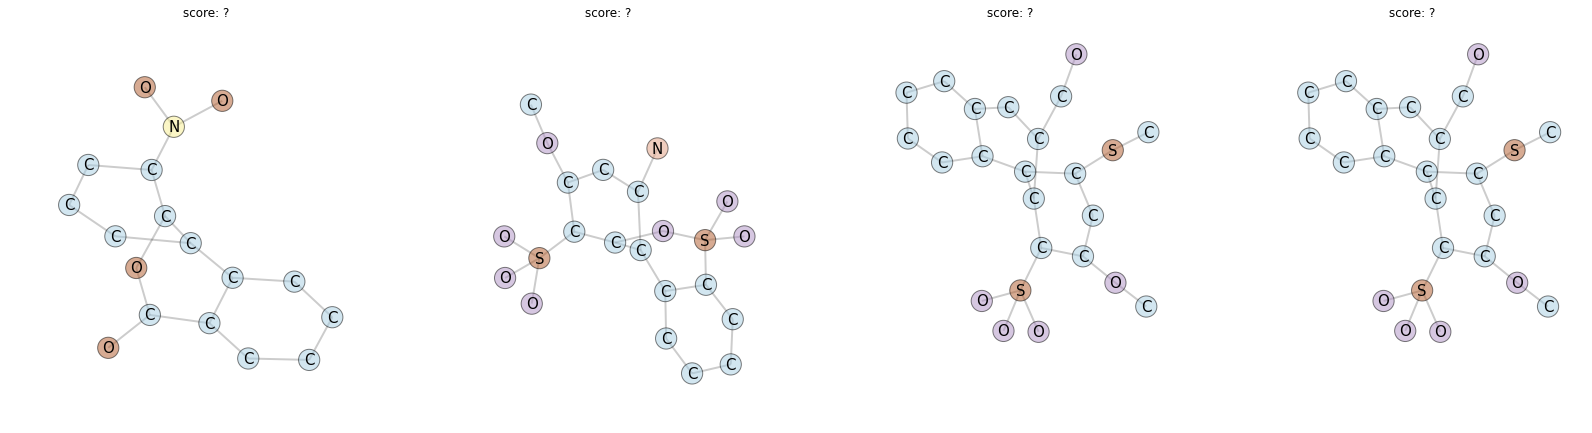

_propose_graph: iteration 0 ; core 0 of 3 ; original_cips tried  0 ; size 45
_propose_graph: iteration 1 ; core 0 of 3 ; original_cips tried  0 ; size 45
_propose_graph: iteration 2 ; core 0 of 9 ; original_cips tried  0 ; size 43
_propose_graph: iteration 3 ; core 0 of 3 ; original_cips tried  0 ; size 45
_propose_graph: iteration 4 ; core 0 of 5 ; original_cips tried  0 ; size 43
_propose_graph: iteration 5 ; core 0 of 3 ; original_cips tried  0 ; size 45
_propose_graph: iteration 6 ; core 0 of 3 ; original_cips tried  0 ; size 47
_propose_graph: iteration 7 ; core 0 of 10 ; original_cips tried  0 ; size 49
_propose_graph: iteration 8 ; core 0 of 3 ; original_cips tried  0 ; size 51
_propose_graph: iteration 9 ; core 0 of 9 ; original_cips tried  0 ; size 51
_propose_graph: iteration 10 ; core 0 of 9 ; original_cips tried  0 ; size 51
_propose_graph: iteration 11 ; core 0 of 2 ; original_cips tried  0 ; size 55
_propose_graph: iteration 12 ; core 0 of 2 ; original_cips tried  0 ; siz

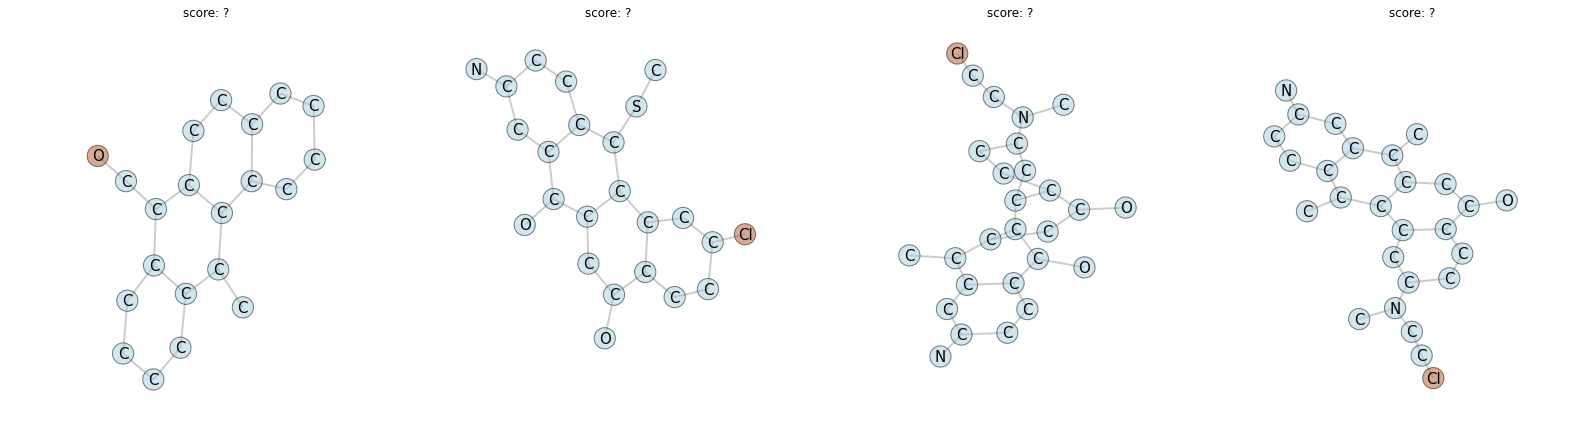

CPU times: user 29.2 s, sys: 1.09 s, total: 30.3 s
Wall time: 32.7 s


In [5]:
%%time
# plot examples of sampling paths
from graphlearn.utils import draw
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    draw.graphlearn(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=draw.get_score_of_graph)

In [6]:
sampler.monitors[1][9] # whats up with the scores? weired! 

{'debug': ['debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_orig_cip: True False',
  'debuglevel:5 accept_or

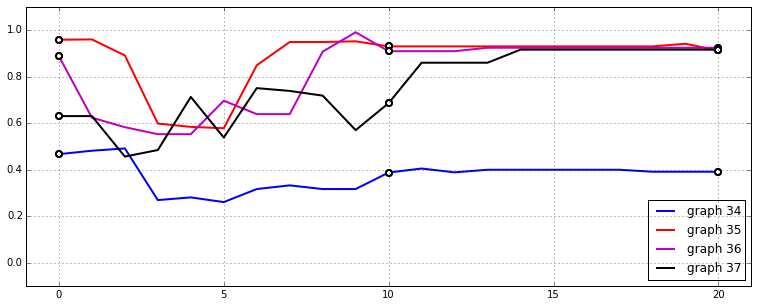

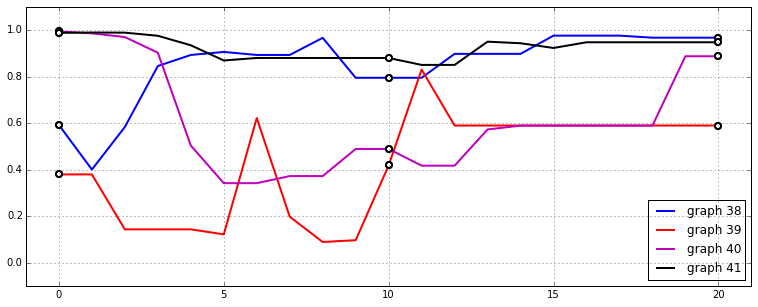

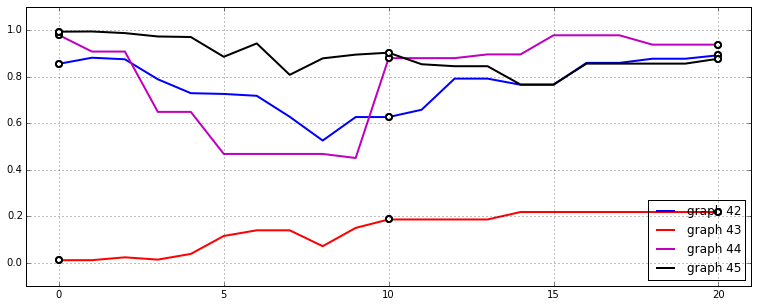

CPU times: user 772 ms, sys: 12 ms, total: 784 ms
Wall time: 778 ms


In [7]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    plt.ylim(-0.1,1.1)
    plt.show()

.

In [8]:
class lol(dict):
    def __init__(self, z):
        self.z=z
    def debug(self,asdasd):
        self[asdasd]=5

z=lol(2)
z.debug(4)
print z

{4: 5}


In [10]:
"%d" % True

'1'